#Time series analysis for ACEA Smart Water Analytics


Can you build a story to predict the amount of water in each unique waterbody? The challenge is to determine how features influence the water availability of each presented waterbody. To be more straightforward, gaining a better understanding of volumes, they will be able to ensure water availability for each time interval of the year.

The time interval is defined as day/month depending on the available measures for each waterbody. Models should capture volumes for each waterbody(for instance, for a model working on a monthly interval a forecast over the month is expected).

The desired outcome is a notebook that can generate four mathematical models, one for each category of waterbody (acquifers, water springs, river, lake) that might be applicable to each single waterbody

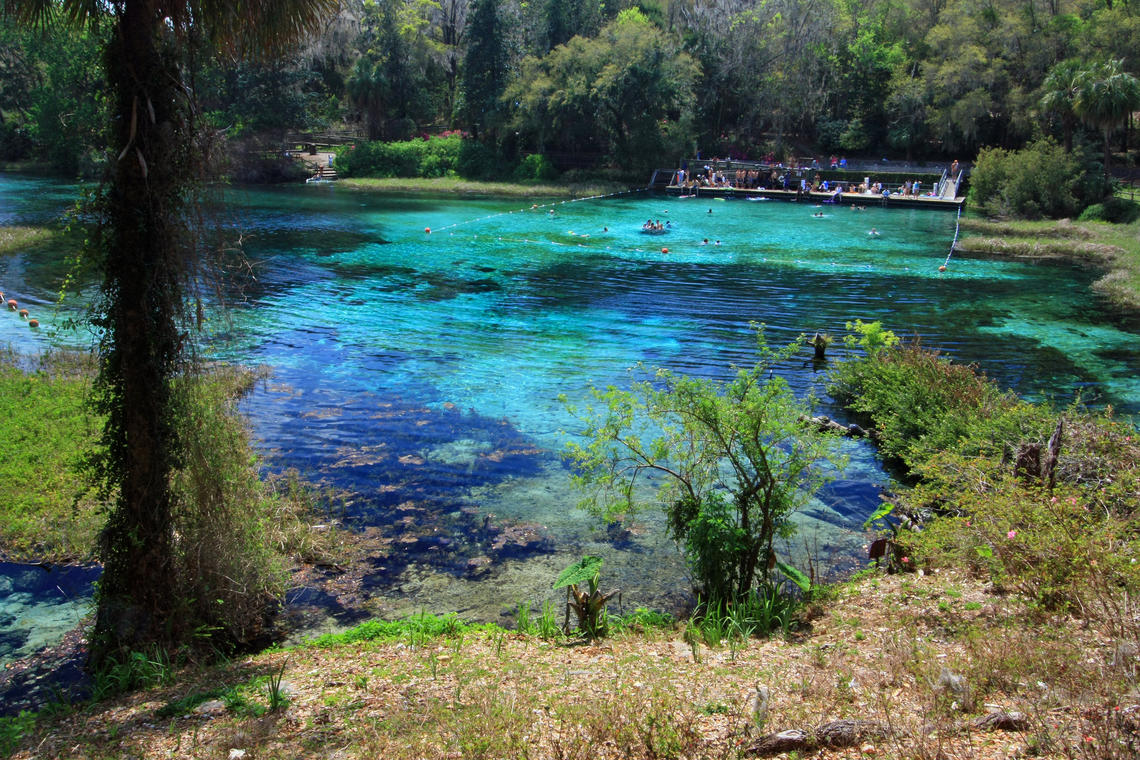
## We will be analyzing the water body 'Water Spring Lupa'

### **Waterbody**: Lupa
### **Type**: Water spring

###**Description**: This water spring is located in the Rosciano Valley, on the left side of the Nera river. The waters emerge at an altitude of about 375 meters above sea level through a long draining tunnel that crosses, in its final section, lithotypes and essentially calcareous rocks. It provides drinking water to the city of Terni and the towns around it.

1. [Data Collection](#datacollection)
2. [Data Pre-Processing](#dataprocessing)
3. [EDA](#EDA)
4. [Univariate Modelling](#univariate-modelling)
5. [Multivariate-modelling](#multivariate-modelling)
6. [Final Results](#results)

<a name="datacollection"></a>
## Data collection

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
#!pip uninstall scikit-learn -y
#!pip install -U scikit-learn

In [3]:
df_lupa = pd.read_csv("/Water_Spring_Lupa.csv")
df_lupa.head()

,Date,Rainfall_Terni,Flow_Rate_Lupa
0,01/01/2009,2.797,NaN
1,02/01/2009,2.797,NaN
2,03/01/2009,2.797,NaN
3,04/01/2009,2.797,NaN
4,05/01/2009,2.797,NaN


<a name="dataprocessing"></a>
## Data Pre-processing

In [4]:
df_lupa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4199 non-null   object 
 1   Rainfall_Terni  4199 non-null   float64
 2   Flow_Rate_Lupa  3817 non-null   float64
dtypes: float64(2), object(1)
memory usage: 98.5+ KB


In [5]:
# Convert the date column to proper format
df_lupa['Date'] = pd.to_datetime(df_lupa['Date'], dayfirst=True)

In [6]:
df_lupa.head()

,Date,Rainfall_Terni,Flow_Rate_Lupa
0,2009-01-01,2.797,NaN
1,2009-01-02,2.797,NaN
2,2009-01-03,2.797,NaN
3,2009-01-04,2.797,NaN
4,2009-01-05,2.797,NaN


#### Since absolute value of flow rate is to be considered, we will convert it to the abs value.

In [7]:
df_lupa['Flow_Rate_Lupa'] = df_lupa['Flow_Rate_Lupa'].abs()

In [8]:
df_lupa.describe()

,Rainfall_Terni,Flow_Rate_Lupa
count,4199.000000,3817.000000
mean,2.466355,97.712916
std,2.041837,15.026314
min,0.000000,0.000000
25%,1.402000,87.220000
50%,2.142000,96.590000
75%,3.165000,105.760000
max,76.000000,182.310000


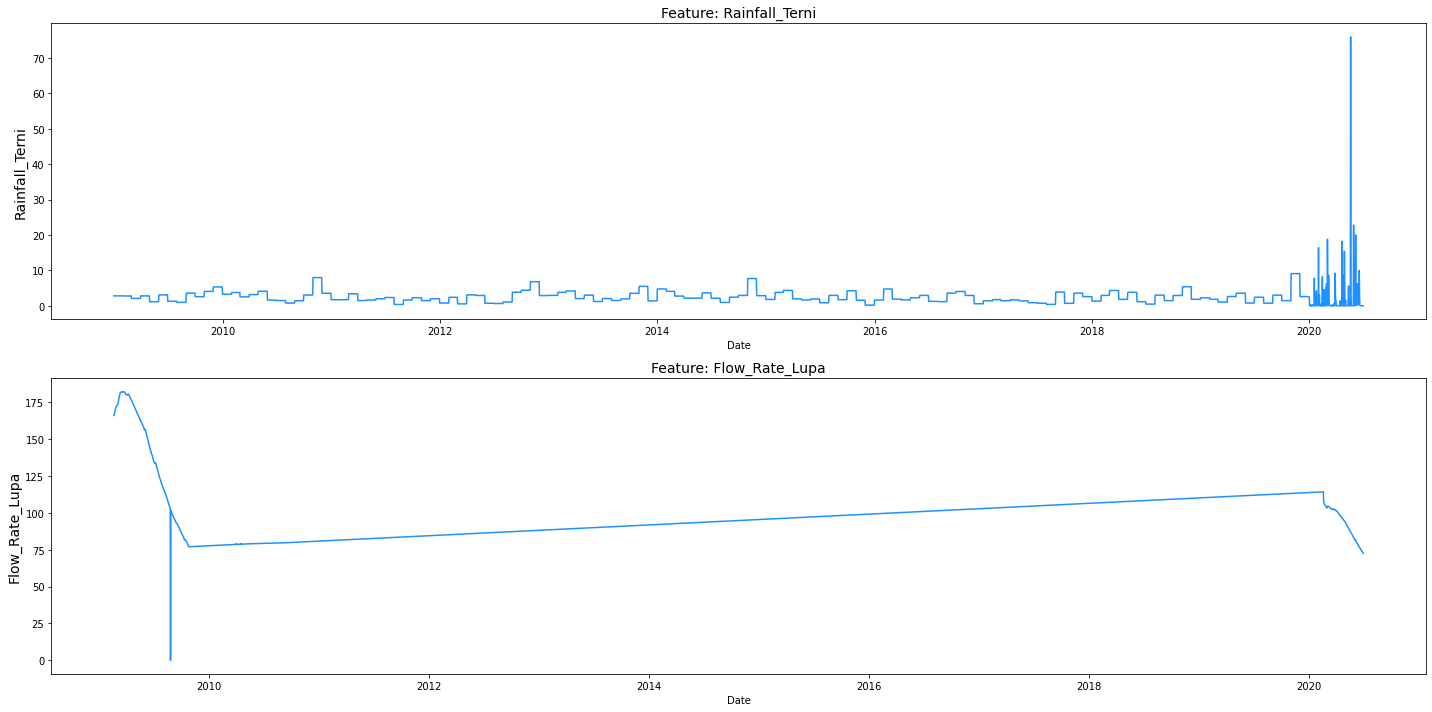

In [9]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))

sns.lineplot(x=df_lupa.Date, y=df_lupa.Rainfall_Terni, ax=ax[0], color='dodgerblue')
ax[0].set_title('Feature: Rainfall_Terni', fontsize=14)
ax[0].set_ylabel(ylabel='Rainfall_Terni', fontsize=14)

sns.lineplot(x=df_lupa.Date, y=df_lupa.Flow_Rate_Lupa, ax=ax[1], color='dodgerblue')
ax[1].set_title('Feature: Flow_Rate_Lupa', fontsize=14)
ax[1].set_ylabel(ylabel='Flow_Rate_Lupa', fontsize=14)

plt.tight_layout()
plt.show()

1. The rainfall has been falling at a fairly constate rate. It has been between 0 to 10mm till 2020.
2. Some days of the year 2020 has seen heaviest rainfalls, even reaching 76mm at a certain day.
3. There are many null values in the flow rate column. Flow rate dropped during 2009 at a significant rate, and then increased at a slow pace between 2010 to 2020. It is on a drop again.
4. The relationship between flow rate and rainfall is not clear from the plots. We will try to figure it in the ACF and PACF plots.

#### There are 382 missing values in our target varaiable 'Flow_Rate_Lupa'. We will compare different methods to replace these null values.

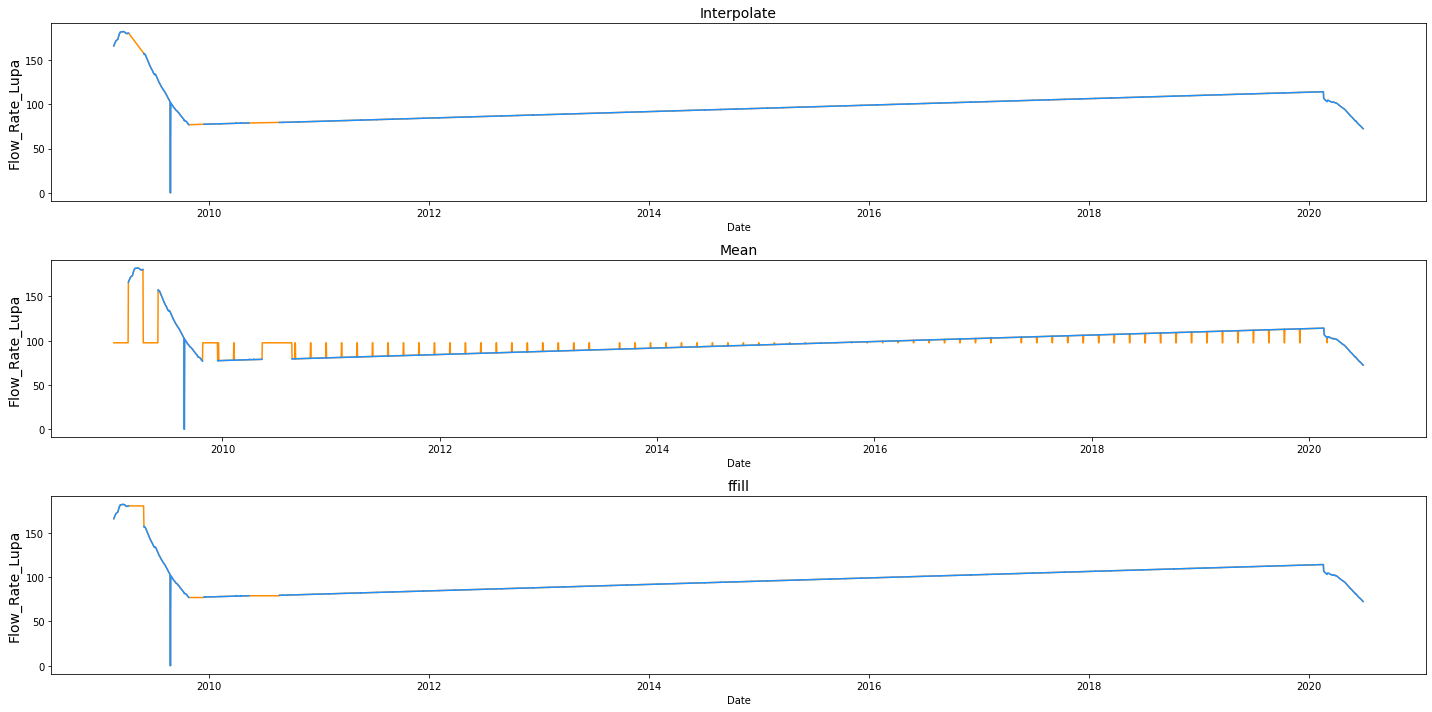

In [10]:
f, ax = plt.subplots(nrows=3, ncols=1, figsize=(20, 10))

sns.lineplot(x=df_lupa.Date, y=df_lupa.Flow_Rate_Lupa.interpolate(), ax=ax[0], color='darkorange')
sns.lineplot(x=df_lupa.Date, y=df_lupa.Flow_Rate_Lupa.fillna(np.inf), ax=ax[0], color='dodgerblue')
ax[0].set_title('Interpolate', fontsize=14)
ax[0].set_ylabel(ylabel='Flow_Rate_Lupa', fontsize=14)

mean_value = df_lupa.Flow_Rate_Lupa.mean()
sns.lineplot(x=df_lupa.Date, y=df_lupa.Flow_Rate_Lupa.fillna(mean_value), ax=ax[1], color='darkorange')
sns.lineplot(x=df_lupa.Date, y=df_lupa.Flow_Rate_Lupa.fillna(np.inf), ax=ax[1], color='dodgerblue')
ax[1].set_title('Mean', fontsize=14)
ax[1].set_ylabel(ylabel='Flow_Rate_Lupa', fontsize=14)

sns.lineplot(x=df_lupa.Date, y=df_lupa.Flow_Rate_Lupa.ffill(), ax=ax[2], color='darkorange')
sns.lineplot(x=df_lupa.Date, y=df_lupa.Flow_Rate_Lupa.fillna(np.inf), ax=ax[2], color='dodgerblue')
ax[2].set_title('ffill', fontsize=14)
ax[2].set_ylabel(ylabel='Flow_Rate_Lupa', fontsize=14)

plt.tight_layout()
plt.show()

#### Interpolate seems to be giving the best imputations. Hence, we will choose it.


In [11]:
df_lupa['Flow_Rate_Lupa'] = df_lupa['Flow_Rate_Lupa'].interpolate() 

In [12]:
df_lupa.Flow_Rate_Lupa

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
4194    73.93
4195    73.60
4196    73.14
4197    72.88
4198    72.55
Name: Flow_Rate_Lupa, Length: 4199, dtype: float64

#### We can see that the first few rows could not be imputed because the first value is NaN(Hence, no value to interpolate from). We will drop these rows.

In [13]:
df_lupa.dropna(inplace=True)

In [14]:
df = df_lupa.copy()

<a name="EDA"></a>
## Exploratory Data Analysis:-
### Analysis after month wise aggregation

In [15]:
df['months'] = df_lupa.Date.dt.strftime('%b')

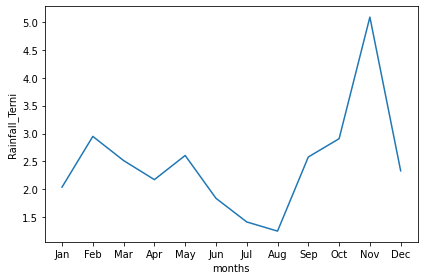

In [16]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
monthly_mean_rainfall = df.groupby(["months"])["Rainfall_Terni"].mean().reset_index()
monthly_mean_rainfall['months'] = pd.Categorical(monthly_mean_rainfall['months'], categories=months, ordered=True)
monthly_mean_rainfall.sort_values(by="months", inplace=True)

sns.lineplot(x=monthly_mean_rainfall.months, y=monthly_mean_rainfall.Rainfall_Terni)
plt.tight_layout()
plt.show()

Rainfall is the highest in the month of november, and least during June, July and August.

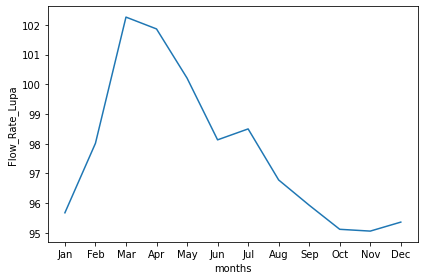

In [17]:
monthly_mean_flowrate = df.groupby(["months"])["Flow_Rate_Lupa"].mean().reset_index()
monthly_mean_flowrate['months'] = pd.Categorical(monthly_mean_flowrate['months'], categories=months, ordered=True)
monthly_mean_flowrate.sort_values(by="months", inplace=True)

sns.lineplot(x=monthly_mean_flowrate.months, y=monthly_mean_flowrate.Flow_Rate_Lupa)
plt.tight_layout()
plt.show()

1. We can see the delayed effect of rainfall on the flow rate here. The effects of rainfall are seen after approximately 3 months. 
2. For e.g., rainfall decreases during february to april(it is very less in fact), hence, the flow rate also decreases from march to june.
3. The rainfall starts to increase from August, and is very high in November. We can see that flow rate also starts to increase from December, and reaches peak on March.

### Time series components

In [18]:
 df_lupa.index = df_lupa.Date

In [19]:
df_lupa.head()

,Date,Rainfall_Terni,Flow_Rate_Lupa
Date,,,
2009-02-19,2009-02-19,2.763,166.02
2009-02-20,2009-02-20,2.763,166.97
2009-02-21,2009-02-21,2.763,167.72
2009-02-22,2009-02-22,2.763,168.65
2009-02-23,2009-02-23,2.763,169.42


In [20]:
# Downsampling

df_downsample = df_lupa.resample('W', on='Date').mean().reset_index(drop=False)
df = df_downsample
df.index = df.Date
df_downsample.head()

,Date,Rainfall_Terni,Flow_Rate_Lupa
Date,,,
2009-02-22,2009-02-22,2.763000,167.340000
2009-03-01,2009-03-01,2.664857,171.357143
2009-03-08,2009-03-08,2.076000,174.832857
2009-03-15,2009-03-15,2.076000,180.868571
2009-03-22,2009-03-22,2.076000,182.022857


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead


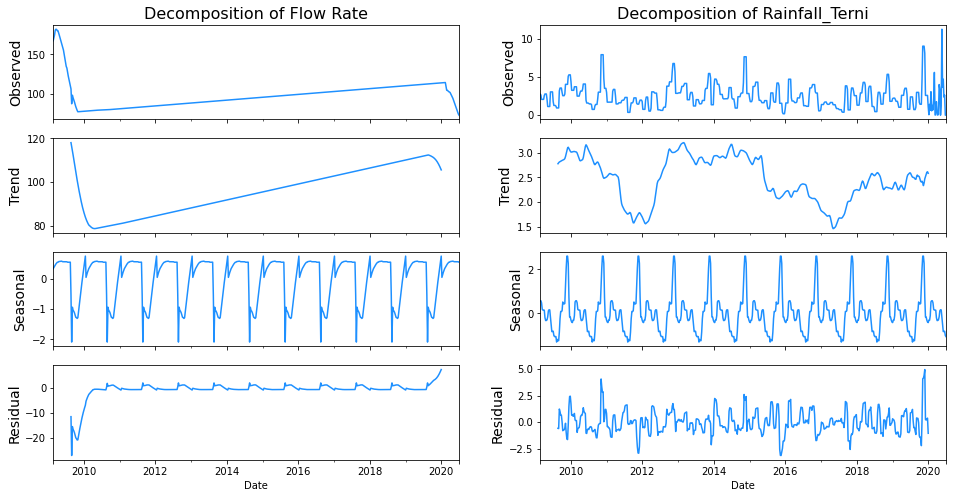

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))
res = seasonal_decompose(df_downsample.Flow_Rate_Lupa, model='additive', freq=52)

ax[0,0].set_title('Decomposition of Flow Rate', fontsize=16)
res.observed.plot(ax=ax[0,0], legend=False, color='dodgerblue')
ax[0,0].set_ylabel('Observed', fontsize=14)

res.trend.plot(ax=ax[1,0], legend=False, color='dodgerblue')
ax[1,0].set_ylabel('Trend', fontsize=14)

res.seasonal.plot(ax=ax[2,0], legend=False, color='dodgerblue')
ax[2,0].set_ylabel('Seasonal', fontsize=14)

res.resid.plot(ax=ax[3,0], legend=False, color='dodgerblue')
ax[3,0].set_ylabel('Residual', fontsize=14)

ax[0,1].set_title('Decomposition of Rainfall_Terni', fontsize=16)
res = seasonal_decompose(df_downsample.Rainfall_Terni, freq=52, model='additive')

res.observed.plot(ax=ax[0, 1], legend=False, color='dodgerblue')
ax[0, 1].set_ylabel('Observed', fontsize=14)

res.trend.plot(ax=ax[1, 1], legend=False, color='dodgerblue')
ax[1, 1].set_ylabel('Trend', fontsize=14)

res.seasonal.plot(ax=ax[2, 1], legend=False, color='dodgerblue')
ax[2, 1].set_ylabel('Seasonal', fontsize=14)

res.resid.plot(ax=ax[3, 1], legend=False, color='dodgerblue')
ax[3, 1].set_ylabel('Residual', fontsize=14)

plt.show()


1. We can see strong seasonality in both flow rate and rainfall. They have also not changed much at all throughout the years.
2. The trend in flow rate has generally been going up, but in recent years it's going down. 
3. The trend in rainfall seems to shows a 'seasonality' in a sense. It goes down, then plateaues at a higher level, and repeats it again. Overall though, the trend is on a downward slope. Perhaps differencing the series twice can remove this trend.
4. This also shows that the series for flow rate is **not stationary**, as it has trend, seasonality, and also the variance is not stable around the mean.

<a name="univariate-modelling"></a>
## Univariate Modelling

### We will fit the following models:-
1. Autoregressive model(AR)
2. Moving Average model(MA)
3. ARIMA model
4. Facebook Prophet

Let's determine the ***p and q terms*** for the autoregressive and moving average processes.
We will also use the Dickey-Fuller test to see if the series is stationary, or needs differencing and transformations.

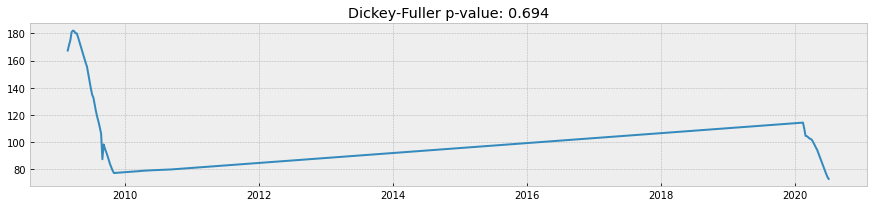

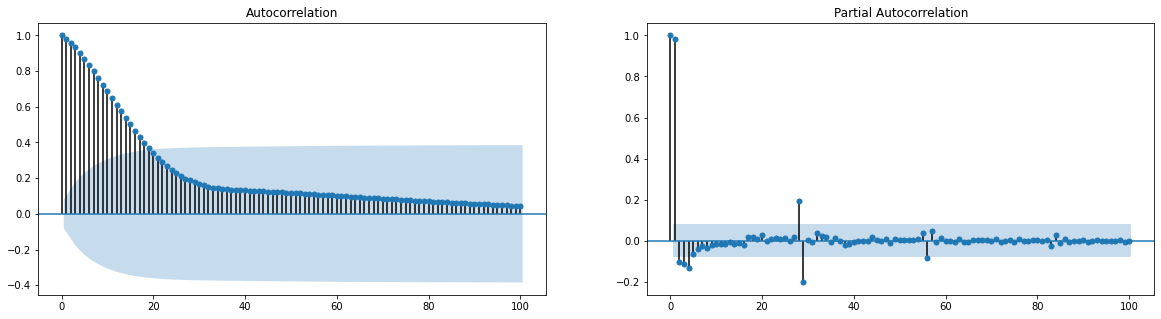

In [22]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm

def plot_acf_pacf(data):
  with plt.style.context('bmh'):  
    plt.figure(figsize=(15,3))
    plt.plot(data)
    plt.title("Dickey-Fuller p-value: {}".format(round(sm.tsa.stattools.adfuller(data)[1], 3)))

  fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, sharex=True, figsize=(20,5))
  sm.graphics.tsa.plot_acf(data, lags=100, ax=ax1)
  sm.graphics.tsa.plot_pacf(data, lags=100, ax=ax2)
  plt.show()

plot_acf_pacf(df.Flow_Rate_Lupa)

1. The p-value of the dickey-fuller test is 0.694, which is >5. Hence, we cannot reject the null hypothesis that the series is non-stationary.
1. The ACF plot of stationary series decreases drops to 0 relatively quickly, instead here it is gradually decreasing. 
2. The PACF plot is showing a significant spike at lag 1. 
3. To calculate the p term, we will take a first difference, and then check the ACF plot. The PACF plot will also change accordingly.

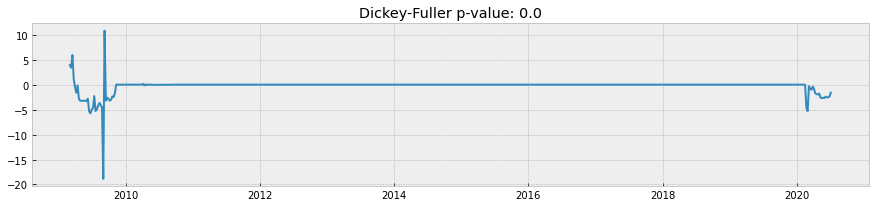

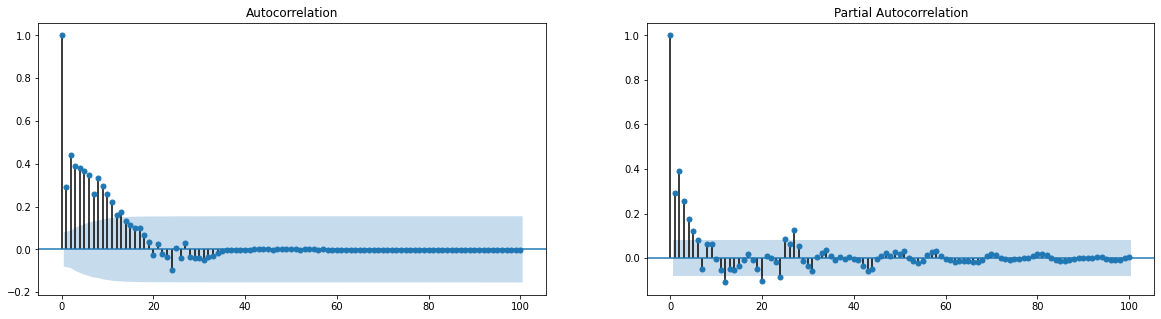

In [23]:
flow_rate_diff = df.Flow_Rate_Lupa - df.Flow_Rate_Lupa.shift(1)
plot_acf_pacf(flow_rate_diff[1:])

1. p-value is zero now, indicating that we can reject the null hypothesis, and call the series statioary.
2. The ACF does not have a very sinusoidal shape, while the PACF has, which is according to the definition of stationary series.
3. However, there are significant spikes at many lags. We will take a 2nd difference, and check the plots again. 

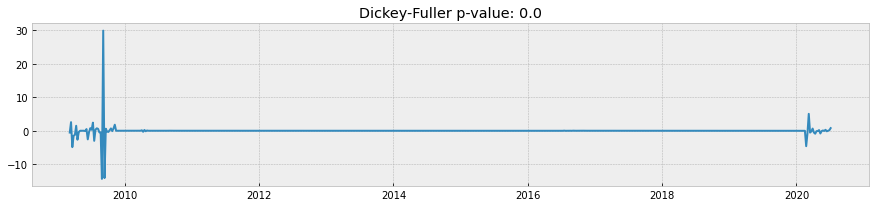

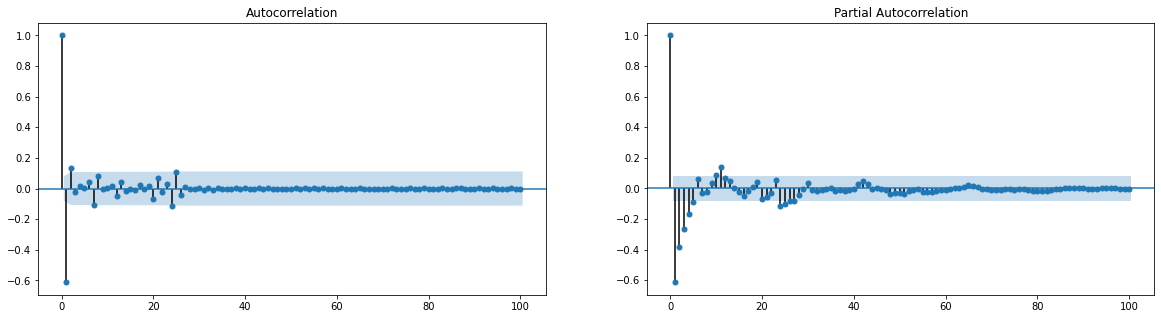

In [24]:
flow_rate_diff = flow_rate_diff - flow_rate_diff.shift(1)
flow_rate_diff
plot_acf_pacf(flow_rate_diff[2:])

1. The ACF plot has a very significant spike at lag 1. Hence, we can take the **q-term** to be 1 for the MA process.
2. The PACF plot is also showing a significant spike at lag 1. However, it also has 3 more spikes after lag 1. But spike 1 lag is much larger than the others, so we will take the **p-term** to be 1.
3. We have differenced the series **twice**. Hence, the d term will be equal to 2.

### Split data for cross-validation

In [25]:
# Set out data for final validation first.
# We will remove the last 90 days data.

final_test_data = df.iloc[len(df)-90:, :] # Data for final testing
data = df.iloc[:len(df)-90, :] # Data used in cross validation

In [26]:
df.shape

(594, 3)

In [27]:
# Prepare data for a 5-fold cross validation
from sklearn.model_selection import TimeSeriesSplit

def get_train_indices(data, n_splits=5):
  tscv = TimeSeriesSplit(n_splits)
  i=0
  for train, test in tscv.split(data):
      i=i+1
      print ("No of observations under train%s=%s" % (i, len(train)))
      print ("No of observations under test%s=%s" % (i, len(test)))

get_train_indices(data.Flow_Rate_Lupa, 5)

No of observations under train1=84
No of observations under test1=84
No of observations under train2=168
No of observations under test2=84
No of observations under train3=252
No of observations under test3=84
No of observations under train4=336
No of observations under test4=84
No of observations under train5=420
No of observations under test5=84


In [28]:
# Split the data based on the above indices

train1, test1 = data.iloc[:84, 2], data.iloc[84:168, 2]
train2, test2 = data.iloc[:168, 2], data.iloc[168:252, 2]
train3, test3 = data.iloc[:252, 2], data.iloc[252:336, 2]
train4, test4 = data.iloc[:336, 2], data.iloc[336:420, 2]
train5, test5 = data.iloc[:420, 2], data.iloc[420:504, 2]

In [29]:
#!pip install --upgrade --no-deps statsmodels

In [30]:
from statsmodels.tsa.arima.model import ARIMA

train_data = [train1, train2, train3, train4, train5]
test_data = [test1, test2, test3, test4, test5]

#### Define the function to train different models:-

In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def train_model(p,d,q):
  RMSE = [] # Append all the RMSE from the cross validations
  for index, train in enumerate(train_data):
    model = ARIMA(train, order=(p,d,q), freq='W-SUN')
    model_fit = model.fit()
    test = test_data[index]
    forecast = model_fit.forecast(steps=len(test))
    rmse = round(sqrt(mean_squared_error(test, forecast)),2)
    RMSE.append(rmse)
  ans = round(sum(RMSE)/5, 2)
  return ans

### Training the models:-

In [32]:
# The factor values for the AR model are:-
# p = 1, d = 2, q = 0
# Call the function
AR_error = train_model(1,2,0)

# The factor values for the MA model are:-
# p = 0, d = 2, q = 1
MA_error = train_model(0,2,1)

# The factor values for the AR model are:-
# p = 1, d = 2, q = 1
ARIMA_error = train_model(1,2,1)

print ("AR error ", AR_error)
print ("MA error ", MA_error)
print ("ARIMA error ", ARIMA_error)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
/usr/local/lib/

AR error  0.02
MA error  0.17
ARIMA error  0.15


#### We see that the AR model is giving the lowest RMSE error, only 0.02. This means our predicted values will be off by 0.02.


### Predict and plot the last 90 days forecast

In [45]:
# Fit the AR model:-
model = ARIMA(data.Flow_Rate_Lupa, order=(1,2,0), freq='W-SUN')
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(final_test_data))
rmse = round(sqrt(mean_squared_error(final_test_data.Flow_Rate_Lupa, forecast)),2)
print (rmse)

11.63


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


In [44]:
model = ARIMA(data.Flow_Rate_Lupa, order=(1,2,1), freq='W-SUN')
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(final_test_data))
rmse = round(sqrt(mean_squared_error(final_test_data.Flow_Rate_Lupa, forecast)),2)
print (rmse)

11.85


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


In [34]:
final_test_data.Flow_Rate_Lupa.mean()

107.49990476190479

#### The RMSE on the final test data for 90 days is 11.63. It is a good score, since the mean value of flow rate during that period is 107.49.  

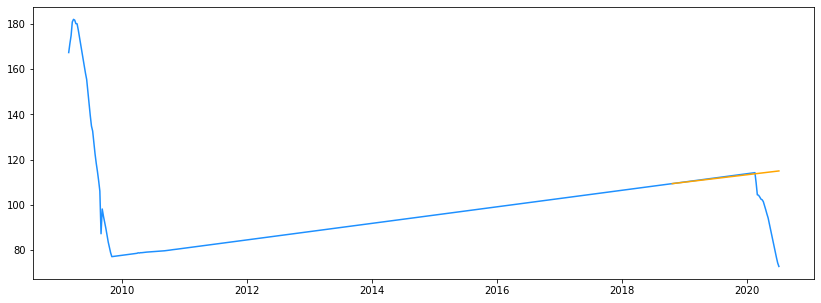

In [35]:
from pylab import rcParams
rcParams['figure.figsize'] = 14,5

plt.plot(df.index, df.Flow_Rate_Lupa, color='dodgerblue')
plt.plot(final_test_data.index, forecast, color='orange')

#### We see that the flow rate for the last few days was not predicted properly. This is because the flow rate trend has been very different in the later part of 2020. It also shows that these models are better for short term forecasts. 

### Facebook Prophet

In [36]:
!pip install prophet

     |████████████████████████████████| 71kB 8.3MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
     |████████████████████████████████| 184kB 31.2MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-cp37-none-any.whl size=6638921 sha256=38eaa04788f4b3450e726cd1e4e5cb0cfc0f7a2e0edc5b42771092a7231757b0
  Stored in directory: /root/.cache/pip/wheels/92/1d/02/bc0a91bd3a84e060722075d2b0b68e875e37ec7dc49451d513
Successfully built prophet
ERROR: Operation cancelled by user


In [37]:
# Change the format to suit the Prophet model

df_prophet = pd.Series.to_frame(data.Flow_Rate_Lupa)
df_prophet.reset_index(inplace=True)
df_prophet.rename(columns={"Date":"ds", "Flow_Rate_Lupa":"y"}, inplace=True)
df_prophet.head()

,ds,y
0,2009-02-22,167.340000
1,2009-03-01,171.357143
2,2009-03-08,174.832857
3,2009-03-15,180.868571
4,2009-03-22,182.022857


In [38]:
final_test_data.head()

,Date,Rainfall_Terni,Flow_Rate_Lupa
Date,,,
2018-10-21,2018-10-21,2.902000,109.350000
2018-10-28,2018-10-28,2.902000,109.420000
2018-11-04,2018-11-04,4.315714,109.490000
2018-11-11,2018-11-11,5.376000,109.568571
2018-11-18,2018-11-18,5.376000,109.650000


In [39]:
from prophet import Prophet

m = Prophet()
m.fit(df_prophet)

future = m.make_future_dataframe(periods=90)
future.tail()

ModuleNotFoundError: ignored

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

fig1 = m.plot(forecast)

In [ ]:
# Train error
rmse = round(sqrt(mean_squared_error(df_prophet.y, forecast.yhat[:len(forecast.yhat)-90])),2)
print ("Train Error", rmse)

# Train error
rmse = round(sqrt(mean_squared_error(final_test_data.Flow_Rate_Lupa, forecast.yhat[len(forecast.yhat)-90:])),2)
print ("Test Error", rmse)

<a name="multivariate-modelling"></a>
## Multivariate modelling

### We will fit the following models:-
1. Linear regression
2. Ridge regression
3. Lasso regression
4. XGBoost

### Feature extraction

1. We have a feature(time-series) called 'Rainfall_terni' in the dataset.
2. We will take different lags of this feature, based on it's seasonality. Looking at the correlation plot, and also doing the modelling with linear models, we can find out which time lags are important in predicting the flow rate.
 

### We saw in the above plots that the effect of rainfall starts to appear in the flow rate after about 2 months, which is an equivalent of about 9 weeks. Let us for safety, take a lag of 12 weeks.

In [ ]:
del df['Date'] # The index already has the dates 

In [ ]:
# Create the copy
df_reg = df.copy()

# Generate the lag variables
for i in range(1,13):
  df_reg["rainfall_lag_{}".format(i)] = df_reg.Rainfall_Terni.shift(i)

In [ ]:
df_reg.head(12)

,Rainfall_Terni,Flow_Rate_Lupa,rainfall_lag_1,rainfall_lag_2,rainfall_lag_3,rainfall_lag_4,rainfall_lag_5,rainfall_lag_6,rainfall_lag_7,rainfall_lag_8,rainfall_lag_9,rainfall_lag_10,rainfall_lag_11,rainfall_lag_12
Date,,,,,,,,,,,,,,
2009-02-22,2.763000,167.340000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-03-01,2.664857,171.357143,2.763000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-03-08,2.076000,174.832857,2.664857,2.763000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-03-15,2.076000,180.868571,2.076000,2.664857,2.763000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-03-22,2.076000,182.022857,2.076000,2.076000,2.664857,2.763000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-03-29,2.076000,181.697143,2.076000,2.076000,2.076000,2.664857,2.763000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-04-05,2.586000,180.130000,2.076000,2.076000,2.076000,2.076000,2.664857,2.763000,NaN,NaN,NaN,NaN,NaN,NaN
2009-04-12,2.790000,180.043361,2.586000,2.076000,2.076000,2.076000,2.076000,2.664857,2.763000,NaN,NaN,NaN,NaN,NaN
2009-04-19,2.790000,177.290784,2.790000,2.586000,2.076000,2.076000,2.076000,2.076000,2.664857,2.763000,NaN,NaN,NaN,NaN


In [ ]:
# Drop the first 12 rows that have NaN because of lag
df_reg = df_reg[12:]

In [ ]:
X = df_reg.drop(columns=['Flow_Rate_Lupa'])
y = df_reg.Flow_Rate_Lupa

In [ ]:
# Set out data for final validation first.
# We will remove the last 90 days data.

X_test = X.iloc[len(X)-90:, :] # Data for final testing
y_test = df_reg.iloc[len(df_reg)-90:, 1]
X_train = X.iloc[:len(X)-90, :] # Data used in cross validation
y_train = df_reg.iloc[:len(df_reg)-90, 1]

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
train_pred = lr_model.predict(X_train)
rmse = round(sqrt(mean_squared_error(y_train, train_pred)),2)
print ("Train RMSE", rmse)

test_pred = lr_model.predict(X_test)
rmse = round(sqrt(mean_squared_error(y_test, test_pred)),2)
print ("Test RMSE", rmse)

Train RMSE 11.92
Test RMSE 17.15


In [ ]:
lr_model.coef_

array([-1.00593563, -0.08818189, -0.24525162,  0.00761789, -0.51857452,
       -0.17700386,  0.07647672, -0.0584188 , -0.35360097, -0.20756517,
       -0.19034467,  0.04570799, -0.70357082])

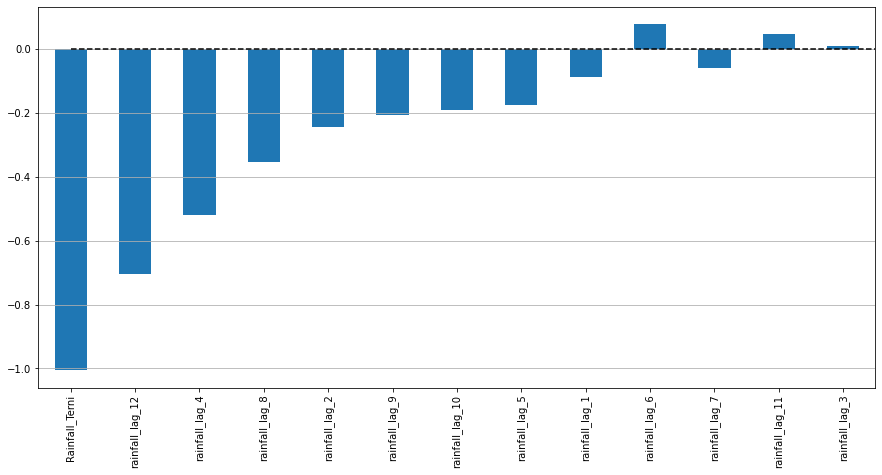

In [ ]:
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

plotCoefficients(lr_model)

### Lasso regression

In [ ]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
train_pred = lasso_model.predict(X_train)
train_rmse = round(sqrt(mean_squared_error(y_train, train_pred)),2)
print ("Train RMSE", train_rmse)

test_pred = lasso_model.predict(X_test)
test_rmse = round(sqrt(mean_squared_error(y_test, test_pred)),2)
print ("Test RMSE", test_rmse)

Train RMSE 11.98
Test RMSE 16.78


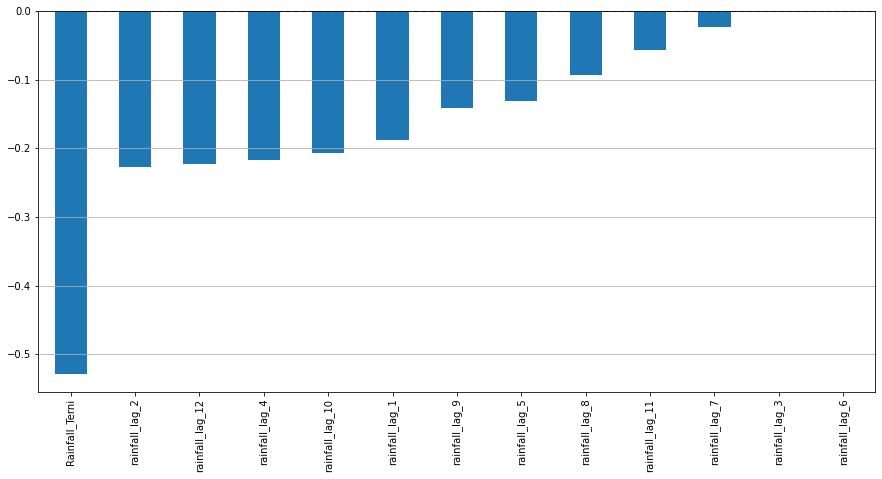

In [ ]:
plotCoefficients(lasso_model)

### Ridge regression

In [ ]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
train_pred = ridge_model.predict(X_train)
train_rmse = round(sqrt(mean_squared_error(y_train, train_pred)),2)
print ("Train RMSE", train_rmse)

test_pred = ridge_model.predict(X_test)
test_rmse = round(sqrt(mean_squared_error(y_test, test_pred)),2)
print ("Test RMSE", test_rmse)

Train RMSE 11.92
Test RMSE 17.15


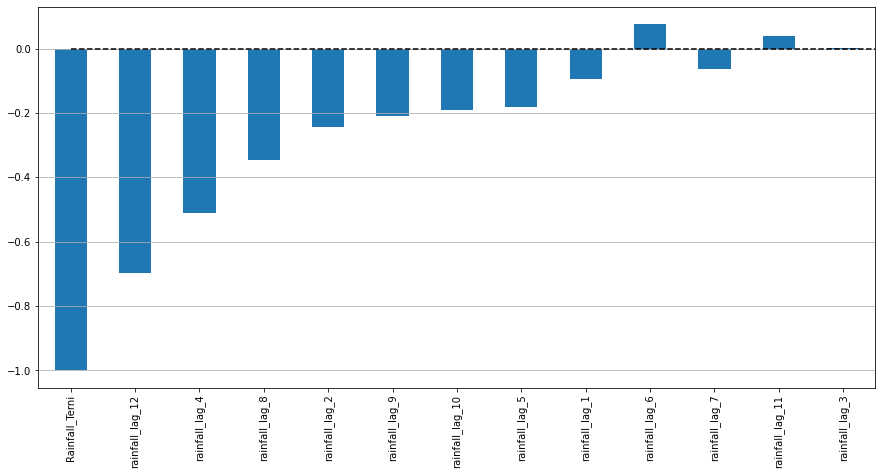

In [ ]:
plotCoefficients(ridge_model)

### XGBoost 

In [ ]:
from xgboost import XGBRegressor 

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

[21:58:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
train_pred = xgb.predict(X_train)
train_rmse = round(sqrt(mean_squared_error(y_train, train_pred)),2)
print ("Train RMSE", train_rmse)

test_pred = xgb.predict(X_test)
test_rmse = round(sqrt(mean_squared_error(y_test, test_pred)),2)
print ("Test RMSE", test_rmse)

Train RMSE 4.63
Test RMSE 16.98


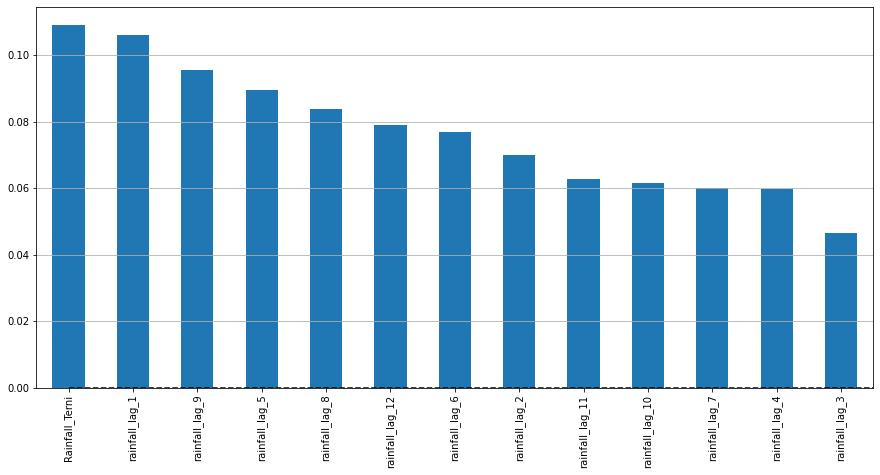

In [ ]:
coefs = pd.DataFrame(xgb.feature_importances_, X_train.columns)
coefs.columns = ["coef"]
coefs["abs"] = coefs.coef.apply(np.abs)
coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)

plt.figure(figsize=(15, 7))
coefs.coef.plot(kind='bar')
plt.grid(True, axis='y')
plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

<a name="results"></a>
# Final Results

### Best Univariate model:-

Model     |     Train error     |     Test error
----------|---------------------|----------------
AR        |        0.02         |     11.85
MA        |        0.17         |     11.85
ARIMA     |        0.15         |     11.85
Prophet   |        2.34         |     10.11

1. We see that there is some overfitting on training data in the autoregressive models, because if almost 0 error.
2. The Prophet model is giving a better test accuracy, and does not seem to be overfitting on the training data.

### Hence, we choose Prophet model to be the best univariate model for the data.

### Effects of Exogenous Factors

1. The multivariate modelling is showing the lag 12 is of the highest importance when it comes to determining the predictive accuracy of the models.
2. That is consistent wit our observation in the EDA, where we see that the flow rate is affected by the rainfall nearly 3 months ago.

### Hence we conclude that the rainfall today will affect the flow rate after 12 weeks only.